# Heat Capacity of Cementite ($Fe_3C$)

Bengt Hallstedt, Dejan Djurovic, Jörg von Appen, Richard Dronskowski, Alexey Dick, Fritz Körmann, Tilmann Hickel, Jörg Neugebauer, Thermodynamic properties of cementite, Calphad, Volume 34, Issue 1, March 2010, Pages 129-133, ISSN 0364-5916, http://dx.doi.org/10.1016/j.calphad.2010.01.004. (http://www.sciencedirect.com/science/article/pii/S0364591610000052)

The TDB file used here differs slightly from the published TDB to ensure compatibility with pycalphad's TDB parser. All phases except cementite are omitted. The numerical results should be the same.

In [6]:
TDB = """
 ELEMENT C    GRAPHITE                   12.011     1054.0      5.7423 ! 
 ELEMENT FE   BCC_A2                     55.847     4489.0     27.2797 ! 
 TYPE_DEFINITION % SEQ * !
 TYPE_DEFINITION A GES AMEND_PHASE_DESCRIPTION @ MAGNETIC -3 0.28 !
 PHASE CEMENTITE_D011 %A 2 3 1 !
 CONSTITUENT CEMENTITE_D011 : FE : C : !
 PARAMETER  G(CEMENTITE_D011,FE:C;0) 0.01 +GFECEM; 6000 N !
 PARAMETER  TC(CEMENTITE_D011,FE:C;0) 0.01 485.00; 6000 N !
 PARAMETER  BMAGN(CEMENTITE_D011,FE:C;0) 0.01 1.008; 6000 N !
 FUNCTION GFECEM      0.01  +11369.937746-5.641259263*T-8.333E-6*T**4;
        43.00  Y  +11622.647246-59.537709263*T+15.74232*T*LN(T)
       -0.27565*T**2;
       163.00  Y  -10195.860754+690.949887637*T-118.47637*T*LN(T)
                  -0.0007*T**2+590527*T**(-1);
      6000.00  N !
"""

Do some initial setup, including reading the database.

In [7]:
# Only needed in a Jupyter Notebook
%matplotlib inline
# Optional plot styling
import matplotlib
matplotlib.style.use('fivethirtyeight')

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from pycalphad import Database, calculate

db = Database(TDB)

Compute the molar heat capacity at all temperatures from 1K to 2000K with a step size of 0.1K.

We do this with the `calculate` routine instead of `equilibrium` because the cementite phase has zero internal degrees of freedom. Since there's nothing to minimize, we can do the computation faster with `calculate`.

In [9]:
result = calculate(db, ['FE', 'C'], 'CEMENTITE_D011', T=(1, 2000, 0.1), P=101325, N=1, output='heat_capacity')

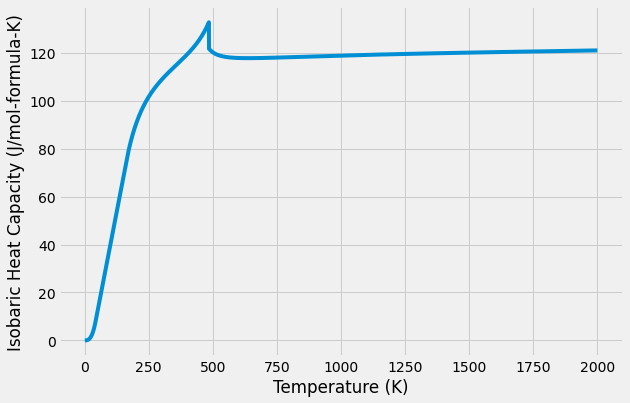

In [10]:
# Note: 4 moles of atoms per formula unit (Fe3C1). That's why we multiply times 4
fig = plt.figure(figsize=(9,6))
fig.gca().set_xlabel('Temperature (K)')
fig.gca().set_ylabel('Isobaric Heat Capacity (J/mol-formula-K)')
fig.gca().plot(result['T'], np.squeeze(4.0 * result['heat_capacity']))
plt.show()